# [Numpy](https://numpy.org/devdocs/user/quickstart.html)


Библиотека NumPy предоставляет следующие **возможности**: 
* работать с многомерными массивами (включая матрицы)
* производить быстрое вычисление математических функций на многомерных массивах

Ядром NumPy является объект [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)


Сегодня нам потребуются следующие библиотеки:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
## рисование графиков внутри ноутбука

## Зачем Numpy?

Посмотрим с какой скоростью выполняется скалярное произведение для list и ndarrays

In [3]:
import time

A_quick = np.random.normal(size = (1000000,))
B_quick = np.random.normal(size = (1000000,))

A_slow, B_slow = list(A_quick), list(B_quick)

In [4]:
%%time
ans = sum([A_slow[i] * B_slow[i] for i in range(1000000)])

CPU times: user 86.2 ms, sys: 16 ms, total: 102 ms
Wall time: 101 ms


In [5]:
%%time
ans = np.sum(A_quick * B_quick)

CPU times: user 1.66 ms, sys: 1.03 ms, total: 2.69 ms
Wall time: 2.04 ms


Встроенная функция скалярного произведения

Почему же так происходит? 

* NumPy array под капотом хранит буквально массив из C. Поэтому ndarray имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически).
* У данных в массиве есть тип. Поэтому мы четко понимаем сколько памяти у нас занимает массив и как оперативно с ним работать.
* Большинство `математическиx` операций реализовано на С в обход питоновских циклов и с использованием процессорных инструкций для векторизованных вычислений. 

Для более детального разбора:
* [тред на stackoverflow](https://stackoverflow.com/questions/8385602/why-are-numpy-arrays-so-fast)
* [Locality of reference](https://en.wikipedia.org/wiki/Locality_of_reference)
* [Внутреннее устройство массива numpy](https://docs.scipy.org/doc/numpy/reference/arrays.html)




![Imgur](https://i.imgur.com/z4GzOX6.png)

# Пройдёмся по основным возможностям

## Создание массивов

Numpy позволяет просто и быстро работать с векторами, матрицами и структурами более высоких порядков: тензорами. Давайте объявим несколько numpy объектов: __a__, - вектор, __b__ - матрица, __c__ - тензор 3 размерности

In [6]:
a = np.array([4, 1, 6])
b = np.array([
    [0, 1, 2],
    [4, 5, 6]
])
c = np.array([
    [
        [3, 1, 0],
        [2, 2, 0]
    ],
    [ 
        [5, 55, 5],
        [5, 55, 5]
    ]
])

In [7]:
a

array([4, 1, 6])

In [8]:
b

array([[0, 1, 2],
       [4, 5, 6]])

In [9]:
c

array([[[ 3,  1,  0],
        [ 2,  2,  0]],

       [[ 5, 55,  5],
        [ 5, 55,  5]]])

### Массивы более высоких размерностей.
Обычно из называют тензорами, хотя пуристы от мира математики могут с этим не согласиться

<img src = "https://madewithml.com/static/images/foundations/numpy/tensors.png" width=500>

### Генерация массивов
Numpy содержит методы примерно на любой разумный случай. В том числе для удобной генерации массивов стандартных видов

* [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) — аналог range из Python, которому можно передать нецелочисленный шаг

In [10]:
np.arange(0, 5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

* [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) — способ равномерно разбить отрезок на n-1 интервал

In [11]:
b = np.linspace(0, 5, 13)
b

array([0.        , 0.41666667, 0.83333333, 1.25      , 1.66666667,
       2.08333333, 2.5       , 2.91666667, 3.33333333, 3.75      ,
       4.16666667, 4.58333333, 5.        ])

In [12]:
b.shape

(13,)

* [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) — способ разбить отрезок по логарифмической шкале

In [13]:
a = np.logspace(start=1, stop=5, num=6, base=2)
a

array([ 2.        ,  3.48220225,  6.06286627, 10.55606329, 18.37917368,
       32.        ])

* [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) — создаёт массив заполненный нулями заданной размерности

In [14]:
np.zeros((2, 2, 5))

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

* [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) — создаёт массив заполненный единицами заданной размерности

In [15]:
np.ones((2, 2, 7))

array([[[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]]])

* [eye](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html) - создаёт единичную матрицу заданного размера

In [16]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Если нет уверенности о том, существует ли какая-то функция, можно сделать поиск прямо внутри numpy. Или погуглить (:

## Преобразования размерностей над матрицами

Pазмеры массива хранятся в поле **shape**, а количество размерностей - в **ndim**

In [17]:
array = np.ones([2, 4, 3])
print(array)
array.shape, array.ndim

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


((2, 4, 3), 3)

Метод [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) позволяет преобразовать размеры массива без изменения данных. При этом данные не копируются, создаётся только новое представление поверх той же физической памяти с числами

In [18]:
array = np.arange(0, 6, 0.5)
print(array)
array = array.reshape((2, 2, 3))
array

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


array([[[0. , 0.5, 1. ],
        [1.5, 2. , 2.5]],

       [[3. , 3.5, 4. ],
        [4.5, 5. , 5.5]]])

Для того, что бы развернуть многомерный массив в вектор, можно воспользоваться функцией [ravel](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ravel.html)

In [19]:
array.ravel()

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

### Транспонирование матрицы

In [20]:
A = np.arange(10).reshape(2, 5)
print(A)
A.T

[[0 1 2 3 4]
 [5 6 7 8 9]]


array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

Заметим, что сама матрица А не изменилась. A.T - новый объект, который возвращает функция транспонирования.

In [21]:
A

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

Однако транспонировать одномерный вектор мы не умеем, точнее, там нет размерностей, которые бы можно было местами поменять.

In [22]:
a = np.array([1, 2, 3, 4])
print(a.shape)
print(a)
a.T

(4,)
[1 2 3 4]


array([1, 2, 3, 4])

Если размерностей больше одной, всё работает как ожидается

In [23]:
a = np.array([[1, 2, 3, 4]])
print(a.shape)
print(a)
a.T

(1, 4)
[[1 2 3 4]]


array([[1],
       [2],
       [3],
       [4]])

### Добавление размерностей

Чтобы транспонировать вектор нам необходимо превратить его в матрицу (n,1). Это можно сделать двумя способами:
* [np.expand_dims](https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html)
* [np.newaxis](https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it)

In [24]:
a = np.array([1, 2, 3, 4])
a1 = np.expand_dims(a, 1) #добавить размерность по след. координате
a2 = a[:, np.newaxis] # : - все элементы по 1 коорд.(см. индексацию ниже), np.newaxis - новая координата

In [25]:
a1

array([[1],
       [2],
       [3],
       [4]])

In [26]:
a2

array([[1],
       [2],
       [3],
       [4]])

In [27]:
a.shape, a1.shape, a2.shape 

((4,), (4, 1), (4, 1))

Заметьте, получается, что изначальный numpy.ndarray - столбец, а вовсе не строка!

## Операции над матрицами

In [28]:
A = np.arange(9).reshape(3, 3)
B = np.arange(2, 11).reshape(3, 3)
print(A)
print(B)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


Операции над матрицами одинаковых размерностей осуществляются поэлементно

In [29]:
A + B

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [30]:
A / B

array([[0.        , 0.33333333, 0.5       ],
       [0.6       , 0.66666667, 0.71428571],
       [0.75      , 0.77777778, 0.8       ]])

In [31]:
A ** B

array([[         0,          1,         16],
       [       243,       4096,      78125],
       [   1679616,   40353607, 1073741824]])

Отдельно обратим внимание на то, что умножение массивов также является **поэлементным**, а не матричным:

In [32]:
A * B

array([[ 0,  3,  8],
       [15, 24, 35],
       [48, 63, 80]])

Универсальные функции (sin, cos, exp и т.д.) также применяются поэлементно:

In [33]:
A = np.arange(9).reshape(3, 3)
np.exp(A)

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00],
       [2.00855369e+01, 5.45981500e+01, 1.48413159e+02],
       [4.03428793e+02, 1.09663316e+03, 2.98095799e+03]])

Для выполнения матричного умножения необходимо использовать функцию dot или оператор `@`. Однако, в случае массивов размерности не 2 эти конструкции не эквивалентны.

In [34]:
A.dot(B)

array([[ 21,  24,  27],
       [ 66,  78,  90],
       [111, 132, 153]])

In [35]:
A @ B

array([[ 21,  24,  27],
       [ 66,  78,  90],
       [111, 132, 153]])

А что будет если произвести операцию между матрицей и скаляром?

In [36]:
4 * A

array([[ 0,  4,  8],
       [12, 16, 20],
       [24, 28, 32]])

In [37]:
A + 10

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

### Broadcasting, или операции с массивами разных размерностей.
В общем случае это не работает:

In [38]:
np.zeros((2,4)) + np.zeros((3,5))

ValueError: operands could not be broadcast together with shapes (2,4) (3,5) 

Но в некоторых случаях работает

In [39]:
left = np.zeros([4, 3])
right = np.array([0, 1, 2])
print(f'{left}\n\n+\n\n{right}\n\n=\n\n{left+right}')

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

+

[0 1 2]

=

[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]


А если добавим к столбцу строку?

In [40]:
left = np.array([[ 0], 
          [10], 
          [20], 
          [30]])
right = np.array([0, 1, 2]) 
print(f'{left}\n\n+\n\n{right}\n\n=\n\n{left+right}')

[[ 0]
 [10]
 [20]
 [30]]

+

[0 1 2]

=

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


Почему так происходит?

Broadcasting снимает правило одной размерности и позволяет производить арифметические операции над массивами разных, но все-таки согласованных размерностей. 

Если количество размерностей не совпадает, то к массиву меньшей размерности добавляются фиктивные размерности "слева". 

Проще всего показать на картинке:

![title](http://www.scipy-lectures.org/_images/numpy_broadcasting.png)

Если размерности не согласуются, то операция невозможна.

![Imgur](https://i.imgur.com/9LvGoeL.gif)

Подробности о правилах, по которым это работает, можно почитать на русском языке [тут](https://tirinox.ru/numpy-broadcasting/) или подробно, но по-английски в [официальной доке](https://numpy.org/doc/stable/user/basics.broadcasting.html)

Broadcasting работает не только для сложения, но и для любой операции.

In [41]:
np.array([[ 0], 
          [10], 
          [20], 
          [30]]) ** np.array([0, 1, 2]) 

array([[  1,   0,   0],
       [  1,  10, 100],
       [  1,  20, 400],
       [  1,  30, 900]])

In [42]:
np.arange(27).reshape(3, 3, 3) + np.arange(3)

array([[[ 0,  2,  4],
        [ 3,  5,  7],
        [ 6,  8, 10]],

       [[ 9, 11, 13],
        [12, 14, 16],
        [15, 17, 19]],

       [[18, 20, 22],
        [21, 23, 25],
        [24, 26, 28]]])

## Конкатенация многомерных массивов

Конкатенировать несколько массивов можно с помощью функций [**np.concatenate, np.hstack, np.vstack**](https://stackoverflow.com/questions/33356442/when-should-i-use-hstack-vstack-vs-append-vs-concatenate-vs-column-stack)

In [43]:
A = np.arange(9).reshape(3, 3)
B = np.arange(1, 10).reshape(3, 3)

In [44]:
np.hstack([A, B])

array([[0, 1, 2, 1, 2, 3],
       [3, 4, 5, 4, 5, 6],
       [6, 7, 8, 7, 8, 9]])

In [45]:
np.vstack([A, B])

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## Агрегирующие операции

Numpy поддерживает множество агрегирующих операций, такие как sum(), prod(), max(), min(). Эти операции применяются на выбранные оси тензора и размерность тензора уменьшается. Давайте сгенерируем тензор размерности 3 и попробуем применить эти операции:

In [46]:
tensor = np.random.choice(a=[0,1,2,3], size=(2,3,4)) #рандомайз
tensor

array([[[0, 3, 3, 0],
        [3, 0, 0, 3],
        [3, 3, 3, 1]],

       [[1, 0, 1, 0],
        [1, 2, 1, 2],
        [2, 2, 1, 0]]])

np.random дает возможность использовать различные функции генерации данных. np.random.choice генерирует тензор данного размера size, который состоит из элементов множества a.

Просуммируем все значения тензора:

In [47]:
tensor.sum()

np.int64(35)

Просуммируем все значения тензора по оси 0:

In [48]:
tensor_sum_0 = tensor.sum(axis = (0,1))
tensor_sum_0.shape, tensor_sum_0

((4,), array([10, 10,  9,  6]))

Размерность тензора уменьшилась. Выберем другую агрегирующую операцию и другую ось:

In [49]:
tensor_max_2 = tensor.max(axis = 2)
tensor_max_2.shape, tensor_max_2

((2, 3),
 array([[3, 3, 3],
        [1, 2, 2]]))

Некоторые операции над массивами (например, вычисления минимума, максимума, суммы элементов) выполняются над всеми элементами вне зависимости от формы массива, однако при указании оси выполняются вдоль нее (например, для нахождения максимума каждой строки или каждого столбца):

In [50]:
A.min()

np.int64(0)

In [51]:
A.max(axis = 0)

array([6, 7, 8])

In [52]:
A.sum(axis = 1)

array([ 3, 12, 21])

## [Типы Данных](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html)

Мы много поигрались с простыми числами `int`, `float`. Но можно использовать комплексные числа и очень **длинные** числа

In [53]:
a = np.array([2 + 3j, 4 + 5j])
b = np.array([np.longdouble(1/10**(1000))])
a.dtype, b.dtype

(dtype('complex128'), dtype('float128'))

Можно и строки хранить.

In [54]:
s = np.array(['abra', 'zxcv', 'щаоштпавтищав'])
s.dtype, type(s[0]), s[0].dtype

(dtype('<U13'), numpy.str_, dtype('<U4'))

Читаем Unicode длины меньше 13 (максимальное слово)

Да и вообще можно кастовать любой лист к массиву. Типы приводятся к какому-то общему. Объекты ссылочных типов хранятся по ссылке.

In [59]:
def f():
    pass

class A(object):
    def __init__(self):
        pass

a = A()
np.array([2, 'asd', {'d':'a'}, a, f, A])

array([2, 'asd', {'d': 'a'}, <__main__.A object at 0x749392cd5910>,
       <function f at 0x749392ca2700>, <class '__main__.A'>], dtype=object)

Для всех кто хочет глубже погрузиться в систему типов numpy - [вот сюда](https://numpy.org/doc/stable/reference/arrays.dtypes.html#data-type-objects-dtype).
И в само устройство массивов - [сюда](https://numpy.org/doc/stable/reference/arrays.html)

## Индексация

В NumPy работает привычная индексация Python, включая использование отрицательных индексов и срезов

In [60]:
array = np.arange(0,5)

In [61]:
print(array[0])
print(array[-1])
print(array[1:-1])
print(array[1:-1:2])
print(array[::-1])

0
4
[1 2 3]
[1 3]
[4 3 2 1 0]


**Замечание**: Индексы и срезы в многомерных массивах не нужно разделять квадратными скобками 

т.е. вместо ```matrix[i][j]``` нужно использовать ```matrix[i, j]```

Чтобы взять срезы по матрице можно использовать `:`

In [62]:
a = np.arange(27).reshape(3,3,3)
a[:,:,2], a[:,2,2]

(array([[ 2,  5,  8],
        [11, 14, 17],
        [20, 23, 26]]),
 array([ 8, 17, 26]))

Или еще более странный синтаксический сахар: `...` - `все остальное`

In [63]:
a[...,2], a[..., 2, 2]

(array([[ 2,  5,  8],
        [11, 14, 17],
        [20, 23, 26]]),
 array([ 8, 17, 26]))

### Индексирование масками

In [64]:
a = np.arange(0, 10)

In [65]:
(a % 3 == 0)

array([ True, False, False,  True, False, False,  True, False, False,
        True])

In [66]:
mask = (a % 3 == 0)
extract_from_a = a[mask] 
extract_from_a          

array([0, 3, 6, 9])

Индексирование маской может быть очень полезным для присваивания значений части элементов массива:


In [67]:
a[a % 3 == 0] = -1
a

array([-1,  1,  2, -1,  4,  5, -1,  7,  8, -1])

### Индексирование массивом целых чисел

In [68]:
a = np.arange(10,  27)
a

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [69]:
a[[2, 3, 2, 4]] 

array([12, 13, 12, 14])

In [70]:
a[[2, 4]] = -1000
a

array([   10,    11, -1000,    13, -1000,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26])

In [71]:
a = np.arange(10, 20)
idx = np.array([[3, 4], 
                [9, 7]])
idx.shape

(2, 2)

In [72]:
a[idx]

array([[13, 14],
       [19, 17]])

In [73]:
b = a.reshape((2, 5))

In [74]:
idx = np.array([(1, 1)])

In [75]:
b[idx]

array([[[15, 16, 17, 18, 19],
        [15, 16, 17, 18, 19]]])

### Векторизация собственных функции в Numpy

Чтобы сделать собственную `векторизованную` (т.е. применяемую к нескольким элементам параллельно) функцию можно воспользоваться `np.vectorize`. 
Это довольно тонкая тема, но основная информация есть в [документации](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html#numpy-vectorize) 

Рассмотрим пример функции проверяющей, правда ли массив - палиндром.

In [76]:
pal = lambda x: str(x) == str(x)[::-1]

In [77]:
a = np.array([11, 21, 343, 40]) 
pal(a) #воспринимает за x весь массив, str(x) - строковое представление массива

False

In [78]:
vpal = np.vectorize(pal)

In [79]:
vpal(a)

array([ True, False,  True, False])

Теперь фунция применяется параллельно к каждому элементу массива

# Пример использования на чуть более реальной задаче.

Есть несколько способов индексирования тензоров. Мы их рассмотрим подробнее в этом разделе.

Но с маленькими тензорами работать не интересно. Давайте для начала создадим большой тензор. Сделаем матрицу размерности (1000, 2) проинициализируем ее элементы случайными числами из простых нормальных распределений:

In [80]:
coordinates_1 = np.random.normal(loc=[10, 10], scale = [30, 20], size = (500,2))
coordinates_2 = np.random.normal(loc=[50, 20], scale = [10, 70], size = (500,2))
coordinates = np.concatenate([coordinates_1, coordinates_2])

Эта матрица будет соответствовать координатам 1000 точек в пространстве. Давайте для наглядности их отобразим на плоскости:

Давайте раскрасим наши распределения:

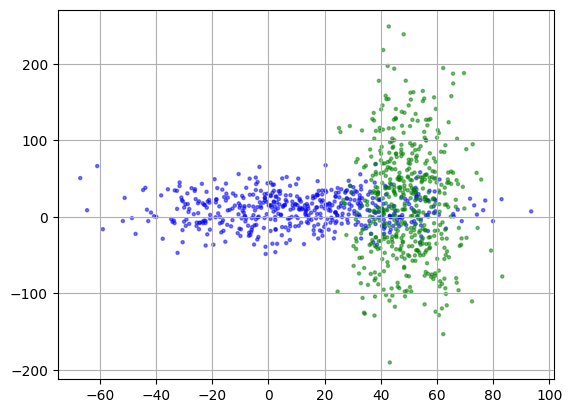

In [81]:
plt.scatter(coordinates[:,0], coordinates[:,1], s=5, color=np.where(np.arange(0, 1000) < 500, 'blue', 'green'), alpha=.5)
plt.grid()

Здесь мы встретились с функцией **np.where**, которая является некоторым аналогом if-then-else. В качестве первого аргумента она принимает condiniton - вектор булевых значений, в качестве двух других - вектор соответствующего размера или константу. Для тех позиций, где condiniton == True будут выбраны элементы первого вектора, в остальных случаях будут выбраны элементы второго вектора (или значение константы, если передавать константу как мы).

Для индексации в каждой компоненте мы можем использовать синтаксическую структуру slice. В этом случае размерность результата падать не будет, но будет осуществляться выборка в матрице по каждой координате.

Давайте оставим только те точки, в которых X принимает значения от 25 до 75:

In [82]:
X_bordered_coordinates = coordinates[(coordinates[:,0] > 25) & (coordinates[:,0] < 75)]

Здесь мы использовали индексирование булевым вектором. Этот трюк позволяет фильтровать numpy-объекты по некоторому условию.

Давайте отрисуем получившиеся точки поверх всех точек из coordinates:

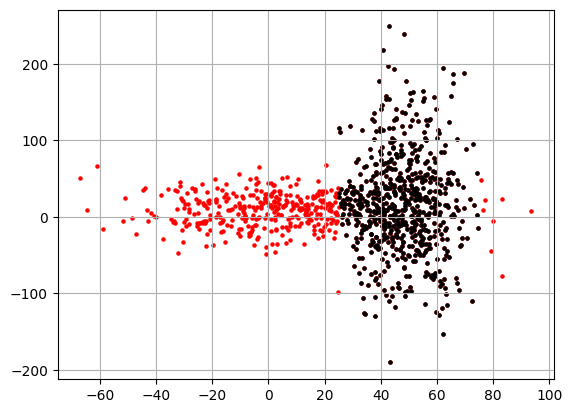

In [83]:
plt.scatter(coordinates[:, 0], coordinates[:, 1], s=5, color='red')
plt.scatter(X_bordered_coordinates[:, 0], X_bordered_coordinates[:, 1], s=5, color='black')
plt.grid()

Для фильтрации мы можем использовать более сложные условия.

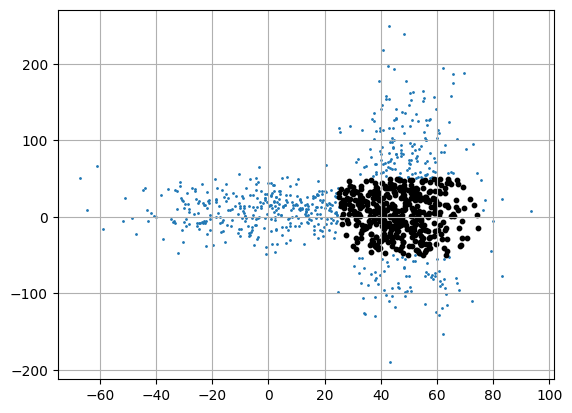

In [84]:
plt.scatter(coordinates[:, 0], coordinates[:, 1], s=1)
bordered_coordinates = coordinates[(coordinates[:,0] > 25) & (coordinates[:,0] < 75) &\
                                  (coordinates[:,1] > -50) & (coordinates[:,1] < 50)]
plt.scatter(bordered_coordinates[:, 0], bordered_coordinates[:, 1], s=10, color='black');
plt.grid()

И еще более сложные:

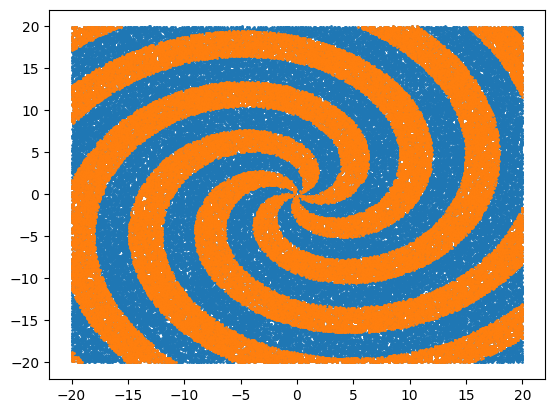

In [85]:
new_coordinates = np.random.uniform(-20, 20, (100000, 2))
plt.scatter(new_coordinates[:, 0], new_coordinates[:, 1], s=1)
xs = new_coordinates[:, 0]
ys = new_coordinates[:, 1]
bordered_coordinates = new_coordinates[np.sin(np.sqrt(xs*xs + ys*ys) + np.arctan2(xs,ys)*5) < 0]
plt.scatter(bordered_coordinates[:, 0], bordered_coordinates[:, 1], s=1);

## Дополнительные материалы

* [Numpy documentation](https://numpy.org/devdocs/user/quickstart.html)
* [100 numpy execises](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises.ipynb) - упражнения с проверкой правильности и ответами, весьма способствуют тому, чтобы вывернуть мозг в нужную сторону и писать более идиоматичный и (обычно) быстрый код с numpy

## Источники материалов:
* [mlcourse.ai](https://github.com/Yorko/mlcourse.ai) - курс Машинного обучения с OpenDataScience
* [AI Seminars](https://github.com/AICommunityInno/Seminars) - семинары по Машинному обучению в Иннополисе
* [HSE-ML course](https://github.com/esokolov/ml-course-hse) - курс Машинного обучения ФКН ВШЭ